In [1]:
#imports
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import folium

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import math
import random
from datetime import timedelta

import warnings
warnings.filterwarnings('ignore')

#color pallete
cnf='#393e46'
dth='#ff2e63'
rec='#21bf73'
act='#fe9801'

#dataframes
df = pd.read_csv('/Users/javkhlan/Desktop/Projects/Data Visualization in Python/DB3/covid19_data_cleaned.csv', parse_dates=['Date'], index_col=0)
country_daywise = pd.read_csv('/Users/javkhlan/Desktop/Projects/Data Visualization in Python/DB3/country_daywise.csv', parse_dates=['Date'])
countrywise = pd.read_csv('/Users/javkhlan/Desktop/Projects/Data Visualization in Python/DB3/countrywise.csv',index_col=0)
daywise = pd.read_csv('/Users/javkhlan/Desktop/Projects/Data Visualization in Python/DB3/daywise.csv', parse_dates=['Date'])

In [2]:
countrywise.drop(countrywise.iloc[:, 4:11], inplace = True, axis = 1)
countrywise.drop('Cases/Million People', inplace = True, axis = 1)
countrywise.head()

,Country,Confirmed,Death,Recovered,Population
0,Afghanistan,45966,1752,36709,38928341
1,Albania,36790,787,18152,2877800
2,Algeria,81212,2393,52568,43851043
3,Andorra,6610,76,5710,77265
4,Angola,15087,345,7763,32866268


In [3]:
#Incidence rate formula 100K to 10K
countrywise['Incidence rate'] = (countrywise['Confirmed']/countrywise['Population']*10000).round(decimals=2)

In [4]:
#Incidence rate >3 : high risk
#Incidence rate >1.5 : moderate
#Incidence rate < 1.5 : low

risk = []
for i in countrywise['Incidence rate']:
    if(i < 1.5):
        risk.append(0)
    elif (i < 3):
        risk.append(1)
    else:
        risk.append(2)
        
countrywise['Risk'] = risk

In [5]:
countrywise.tail()

,Country,Confirmed,Death,Recovered,Population,Incidence rate,Risk
184,West Bank and Gaza,81890,704,62944,4543126,180.25,2
185,Western Sahara,10,1,8,597330,0.17,0
186,Yemen,2160,615,1498,29825968,0.72,0
187,Zambia,17589,357,16925,18383956,9.57,2
188,Zimbabwe,9822,275,8472,14862927,6.61,2


### General Imports for Classification and Regression

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

### Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
#Incidence Rate vs. Risk
x = np.array(countrywise)[:, 5]
y = np.array(countrywise)[:, 6]

# 1D to 2D array
x = x.reshape(-1,1)
y = y.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
linearRegression = LinearRegression().fit(x_train, y_train)
lr_predict = linearRegression.predict(x_test)
print('R-Square: %.2f'%r2_score(y_test, lr_predict))

R-Square: -0.01


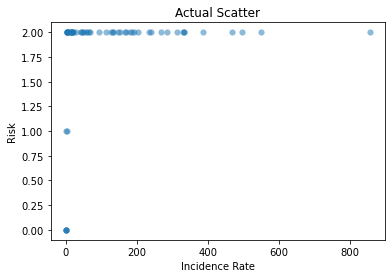

In [9]:
plt.scatter(x_test, y_test, linewidths=0.1, alpha=0.5)
plt.xlabel('Incidence Rate')
plt.ylabel('Risk')
plt.title('Actual Scatter')
plt.show()

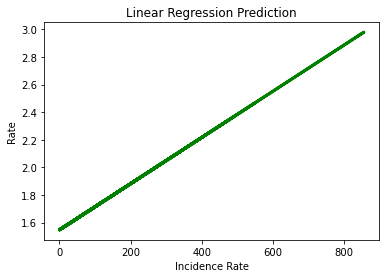

In [10]:
plt.plot(x_test, lr_predict, color='green', linewidth = 3)
plt.xlabel('Incidence Rate')
plt.ylabel('Rate')
plt.title('Linear Regression Prediction')
plt.show()

In [11]:
countrywise.head()

,Country,Confirmed,Death,Recovered,Population,Incidence rate,Risk
0,Afghanistan,45966,1752,36709,38928341,11.81,2
1,Albania,36790,787,18152,2877800,127.84,2
2,Algeria,81212,2393,52568,43851043,18.52,2
3,Andorra,6610,76,5710,77265,855.50,2
4,Angola,15087,345,7763,32866268,4.59,2


In [12]:
#Confirmed vs Recovered
x = np.array(countrywise)[:, 1]
y = np.array(countrywise)[:, 3]

# 1D to 2D array
x = x.reshape(-1,1)
y = y.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
linearRegression = LinearRegression().fit(x_train, y_train)
lr_predict = linearRegression.predict(x_test)
print('R-Square: %.2f'%r2_score(y_test, lr_predict))

R-Square: 0.25


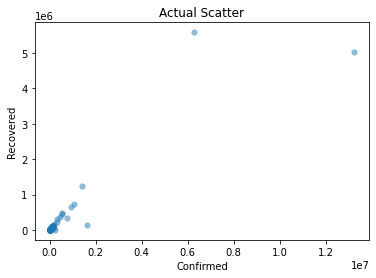

In [13]:
plt.scatter(x_test, y_test, linewidths=0.1, alpha=0.5)
plt.xlabel('Confirmed')
plt.ylabel('Recovered')
plt.title('Actual Scatter')
plt.show()

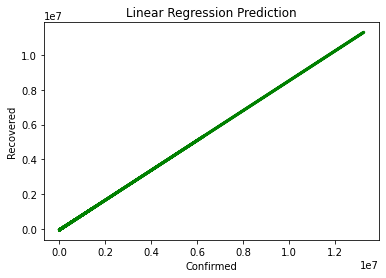

In [14]:
plt.plot(x_test, lr_predict, color='green', linewidth = 3)
plt.xlabel('Confirmed')
plt.ylabel('Recovered')
plt.title('Linear Regression Prediction')
plt.show()

### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
x = countrywise[['Incidence rate']] #Features
y = countrywise['Risk'] #Label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

lr = LogisticRegression().fit(x_train, y_train)
lr_predict = lr.predict(x_test)
print('Accuracy Score: %.2f'%accuracy_score(y_test, lr_predict))
print('Mean Squared Error: %.2f'%mean_squared_error(y_test, lr_predict))
print('R-Square Score: %.2f'%r2_score(y_test, lr_predict))

Accuracy Score: 1.00
Mean Squared Error: 0.00
R-Square Score: 1.00


In [17]:
x = countrywise[['Confirmed','Population']] #Features
y = countrywise['Risk'] #Label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

lr = LogisticRegression().fit(x_train, y_train)
lr_predict = lr.predict(x_test)
print('Accuracy Score: %.2f'%accuracy_score(y_test, lr_predict))
print('Mean Squared Error: %.2f'%mean_squared_error(y_test, lr_predict))
print('R-Square Score: %.2f'%r2_score(y_test, lr_predict))

Accuracy Score: 1.00
Mean Squared Error: 0.00
R-Square Score: 1.00


### Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
x = countrywise[['Incidence rate']] #Features
y = countrywise['Risk'] #Label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

randomForest = RandomForestClassifier().fit(x_train, y_train)
rf_predict = randomForest.predict(x_test)

print('Accuracy Score: %.2f'%accuracy_score(y_test, rf_predict))
print('Mean Squared Error: %.2f'%mean_squared_error(y_test, rf_predict))
print('R-Square Score: %.2f'%r2_score(y_test, rf_predict))

Accuracy Score: 1.00
Mean Squared Error: 0.00
R-Square Score: 1.00


In [20]:
x = countrywise[['Confirmed', 'Population']] #Features
y = countrywise['Risk'] #Label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

randomForest = RandomForestClassifier().fit(x_train, y_train)
rf_predict = randomForest.predict(x_test)

print('Accuracy Score: %.2f'%accuracy_score(y_test, rf_predict))
print('Mean Squared Error: %.2f'%mean_squared_error(y_test, rf_predict))
print('R-Square Score: %.2f'%r2_score(y_test, rf_predict))

Accuracy Score: 0.96
Mean Squared Error: 0.09
R-Square Score: 0.13


### Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
x = countrywise[['Incidence rate']] #Features
y = countrywise['Risk'] #Label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

decisionTree = DecisionTreeClassifier().fit(x_train, y_train)
dt_predict = decisionTree.predict(x_test)

print('Accuracy Score: %.2f'%accuracy_score(y_test, dt_predict))
print('Mean Squared Error: %.2f'%mean_squared_error(y_test, dt_predict))
print('R-Square Score: %.2f'%r2_score(y_test, dt_predict))

Accuracy Score: 1.00
Mean Squared Error: 0.00
R-Square Score: 1.00


In [23]:
x = countrywise[['Confirmed', 'Population']] #Features
y = countrywise['Risk'] #Label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

decisionTree = DecisionTreeClassifier().fit(x_train, y_train)
dt_predict = decisionTree.predict(x_test)

print('Accuracy Score: %.2f'%accuracy_score(y_test, dt_predict))
print('Mean Squared Error: %.2f'%mean_squared_error(y_test, dt_predict))
print('R-Square Score: %.2f'%r2_score(y_test, dt_predict))

Accuracy Score: 0.95
Mean Squared Error: 0.16
R-Square Score: 0.59


### SVM

In [24]:
from sklearn.svm import SVC

In [25]:
x = countrywise[['Incidence rate']] #Features
y = countrywise['Risk'] #Label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

svm = SVC().fit(x_train, y_train)
svm_predict = svm.predict(x_test)

print('Accuracy Score: %.2f'%accuracy_score(y_test, svm_predict))
print('Mean Squared Error: %.2f'%mean_squared_error(y_test, svm_predict))
print('R-Square Score: %.2f'%r2_score(y_test, svm_predict))

Accuracy Score: 0.82
Mean Squared Error: 0.54
R-Square Score: -0.20


In [26]:
x = countrywise[['Confirmed', 'Population']] #Features
y = countrywise['Risk'] #Label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

svm = SVC().fit(x_train, y_train)
svm_predict = svm.predict(x_test)

print('Accuracy Score: %.2f'%accuracy_score(y_test, svm_predict))
print('Mean Squared Error: %.2f'%mean_squared_error(y_test, svm_predict))
print('R-Square Score: %.2f'%r2_score(y_test, svm_predict))

Accuracy Score: 0.82
Mean Squared Error: 0.54
R-Square Score: -0.20


### KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
x = countrywise[['Incidence rate']] #Features
y = countrywise['Risk'] #Label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

knn = KNeighborsClassifier(n_neighbors=20).fit(x_train, y_train)
knn_predict = knn.predict(x_test)

print('Accuracy Score: %.2f'%accuracy_score(y_test, knn_predict))
print('Mean Squared Error: %.2f'%mean_squared_error(y_test, knn_predict))
print('R-Square Score: %.2f'%r2_score(y_test, knn_predict))

Accuracy Score: 0.96
Mean Squared Error: 0.04
R-Square Score: 0.91


In [29]:
x = countrywise[['Confirmed', 'Population']] #Features
y = countrywise['Risk'] #Label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

knn = KNeighborsClassifier(n_neighbors=20).fit(x_train, y_train)
knn_predict = knn.predict(x_test)

print('Accuracy Score: %.2f'%accuracy_score(y_test, knn_predict))
print('Mean Squared Error: %.2f'%mean_squared_error(y_test, knn_predict))
print('R-Square Score: %.2f'%r2_score(y_test, knn_predict))

Accuracy Score: 0.88
Mean Squared Error: 0.44
R-Square Score: -0.13


### KMean

In [30]:
from sklearn.cluster import KMeans

In [31]:
x = countrywise[['Incidence rate']] #Features
y = countrywise['Risk'] #Label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

kmeans = KMeans().fit(x_train, y_train)
kmeans_predict = kmeans.predict(x_test)

print('Accuracy Score: %.2f'%accuracy_score(y_test, kmeans_predict))
print('Mean Squared Error: %.2f'%mean_squared_error(y_test, kmeans_predict))
print('R-Square Score: %.2f'%r2_score(y_test, kmeans_predict))

Accuracy Score: 0.30
Mean Squared Error: 5.07
R-Square Score: -10.33


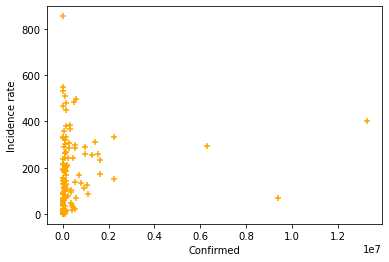

In [32]:
# why it is off accuracy
plt.xlabel('Confirmed')
plt.ylabel('Incidence rate')
plt.scatter(countrywise.Confirmed, 
            countrywise['Incidence rate'], marker='+', color='orange')
plt.show()

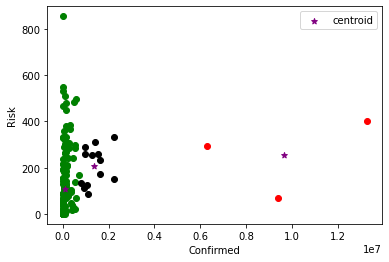

In [33]:
km = KMeans(n_clusters = 3)
y_pred = km.fit_predict(countrywise[['Confirmed', 'Incidence rate']])
countrywise['km_cluster'] = y_pred

km0 = countrywise[countrywise.km_cluster==0]
km1 = countrywise[countrywise.km_cluster==1]
km2 = countrywise[countrywise.km_cluster==2]
plt.scatter(km0.Confirmed, km0['Incidence rate'], color='green')
plt.scatter(km1.Confirmed, km1['Incidence rate'], color='red')
plt.scatter(km2.Confirmed, km2['Incidence rate'], color='black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 
            color='purple', marker='*', label='centroid')
plt.xlabel('Confirmed')
plt.ylabel('Risk')
plt.legend()
plt.show()

### Prophet

In [34]:
from fbprophet import Prophet

In [35]:
df = pd.read_csv('/Users/javkhlan/Desktop/Projects/Data Visualization in Python/DB3/covid19_data_cleaned.csv', parse_dates=['Date'])
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Death'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

confirmed.columns=['ds','y']
confirmed['y']= np.round((confirmed['y']/1000000), decimals=1)

m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=10)

forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
317,2020-12-04,62.436028,61.374360,63.470263
318,2020-12-05,62.894000,61.804599,63.886379
319,2020-12-06,63.266579,62.194677,64.283206
320,2020-12-07,63.709918,62.611418,64.747218
321,2020-12-08,64.161612,63.065481,65.219340


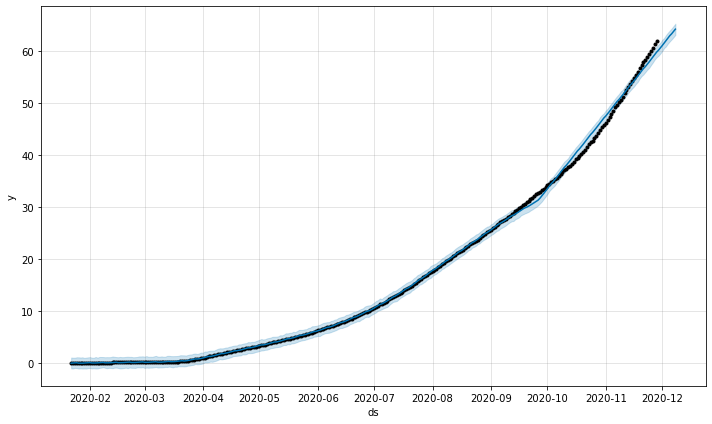

In [36]:
confirmed_forecast_plot = m.plot(forecast)

### Prediction by the end of 2020

In [37]:
df = pd.read_csv('/Users/javkhlan/Desktop/Projects/Data Visualization in Python/DB3/covid19_data_cleaned.csv', parse_dates=['Date'])
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Death'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

confirmed.columns=['ds','y']
confirmed['y']= np.round((confirmed['y']/1000000), decimals=1)

m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=30)

forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
337,2020-12-24,71.446654,69.745146,73.166051
338,2020-12-25,71.927500,69.976894,73.661370
339,2020-12-26,72.385472,70.645105,74.194391
340,2020-12-27,72.758050,70.719879,74.406071
341,2020-12-28,73.201390,71.179299,75.384375


In [38]:
df = pd.read_csv('/Users/javkhlan/Desktop/Projects/Data Visualization in Python/DB3/covid19_data_cleaned.csv', parse_dates=['Date'])
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Death'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

deaths.columns=['ds','y']
deaths['y']= np.round((deaths['y']/1000000), decimals=1)

m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=30)

forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
337,2020-12-24,1.550298,1.490761,1.611212
338,2020-12-25,1.561144,1.507267,1.625007
339,2020-12-26,1.565324,1.505435,1.620169
340,2020-12-27,1.569261,1.510779,1.627587
341,2020-12-28,1.575741,1.517473,1.634009
